#This is a sample project performed by me so as to get fimiliar with the libraries even though the model does not seem to fit well with the given dataset becuase of the errors being inconsistent maybe because this project was originally done on the Bosten house price dataset and that has been removed from the sklearn datasets. I have just made this project for practice purposes and may make a better model for this dataset in the near future.

#Importing the dependencies 

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import preprocessing

#Importing the boston house price Dataset after downloading it from online sources(The dataset has been removed from sklearn)

In [211]:
house_price_dataset =pd.read_csv("housing.csv")

In [212]:
print(house_price_dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

#Loading the dataset into a dataframe

In [213]:
house_price_dataframe=pd.DataFrame(house_price_dataset)

#Printing the first 5 rows of the dataset

In [214]:
house_price_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#Checking the number of rows and columns in the dataframe

In [215]:
house_price_dataframe.shape

(545, 13)

#Checking for any missing values in the dataset

In [216]:
house_price_dataframe.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#Statistical measures of the dataset

In [217]:
house_price_dataframe.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#Understanding the correlation between the features of the dataset
#Positive Correlation-If one of the value in one of the filed increases then the value of the correlated field also increases. 
#Negative(/least) Correlation-If one of the value in one of the filed decreases then the value of the correlated field also decreases.

In [218]:
correlation=house_price_dataframe.corr(numeric_only = True)

#Constructing a heatmap to understand the correlation better.
#cbar is color bar on the right of the heatmap.
#square means that all the values will be present inside a square.
#fmt means how many float values we want.(.1f means 1 value after the decimal point)
#annot means the annotations(feature names) the size decides the size or mappings of the numbers
#cmap is the color of the heat map.

<AxesSubplot: >

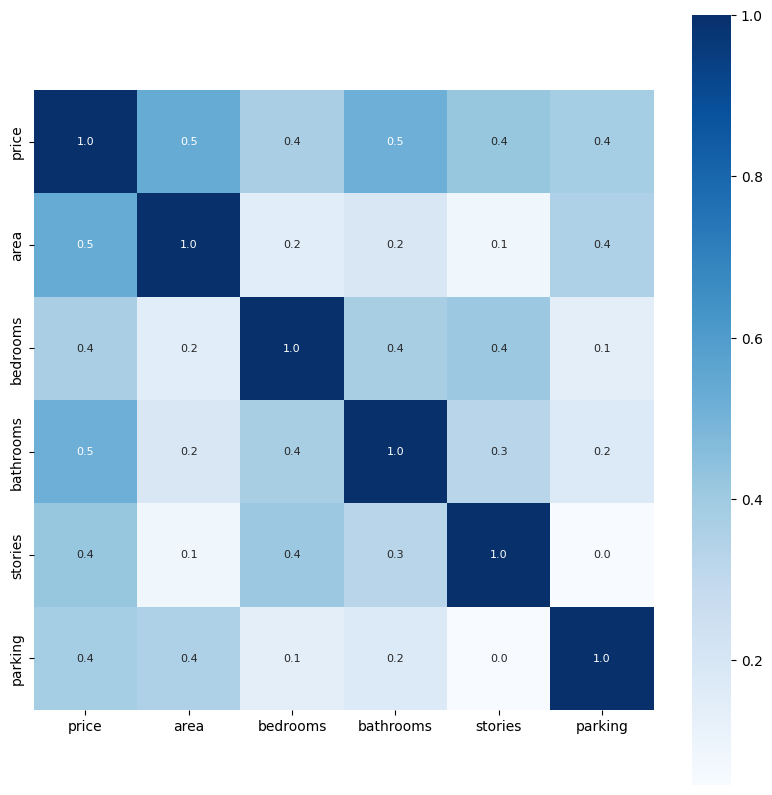

In [219]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#Values 1.0 means that the tile represents Same fields
#Splitting the data and Target

In [220]:
x=house_price_dataframe.drop(['price'],axis=1)#axis=1 indicates that we are dropping a column!
y=house_price_dataframe['price']
print(x)
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

#Splitting the data into training and test data

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#Need 20% of the data in the testing set therefore 0.2 is the test_size

In [222]:
print(x.shape,x_train.shape,x_test.shape)

(545, 12) (436, 12) (109, 12)


#Trainig the model
#XGBoost regressor model based on the decision tree and is an ensemble model having different types of algorithms(logistic and linear combined)

In [223]:
#Loading the model
model=XGBRegressor()

In [224]:
#Encoding the object type to the related datatype for training data  
lbl = preprocessing.LabelEncoder()
x_train['mainroad'] = lbl.fit_transform(x_train['mainroad'].astype(str))
x_train['guestroom'] = lbl.fit_transform(x_train['guestroom'].astype(str))
x_train['basement']=lbl.fit_transform(x_train['basement'].astype(str))
x_train['hotwaterheating']=lbl.fit_transform(x_train['hotwaterheating'].astype(str))
x_train['airconditioning']=lbl.fit_transform(x_train['airconditioning'].astype(str))
x_train['prefarea']=lbl.fit_transform(x_train['prefarea'].astype(str))
x_train['furnishingstatus']=lbl.fit_transform(x_train['furnishingstatus'].astype(str))
#Training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#Evaluation
#Prediction on the training data

In [225]:
#Accuracy for prediction on training data
training_data_prediction=model.predict(x_train)

In [226]:
print(training_data_prediction)

[ 3439453.8  4269161.5  2652306.   4818412.   4242514.   6952712.5
  2913561.5  2682121.   6930822.5  4751732.   3293811.5  2923521.5
  6032533.5  5791301.5  7745864.5  4138114.8  5260644.   4580223.
  7784454.5  4226844.   4190943.   2663417.   5264197.   4378410.
  3916174.   4023553.8  6797925.5  9210163.   4586868.5  3195194.2
  3787007.   3083109.8  2370452.2  4071567.2  4250097.   2864897.
  4853683.   3687840.2  1918581.9  7973882.   4141927.5 12194537.
  8533753.   7409085.   4021300.8  3186948.5  4322010.   3568290.5
  3387958.2  2517306.5  5913831.   4083269.2  3878058.5  3182097.8
  4050111.5  5316206.   3645990.5  3799502.   3636881.   4172023.5
  7474477.5  4318900.   6029483.   2931330.   3797321.2  5504022.5
  6616331.5  5813800.5  5462933.5  5594584.   3248588.5  3566274.8
  2890455.2  4886017.   5249894.   3673468.   5899259.5  4209735.5
  6762079.   5380164.5  3102545.   3564207.8  6590101.   4872898.5
  5903170.   8386659.5  2782403.2  3298490.8  9782774.   4138862.


In [227]:
#R squared error
#Comparing the training data prediction with the original values
score_1=metrics.r2_score(y_train,training_data_prediction)
#Mean absolute error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print("R squared error: ",score_1)#Should be near 0 to indicate good performance lesser the error more accurate the model
print("Mean absolute error: ",score_2)

R squared error:  0.9969523470040218
Mean absolute error:  58240.85493119266


#Visualise the actual and the predicted prices

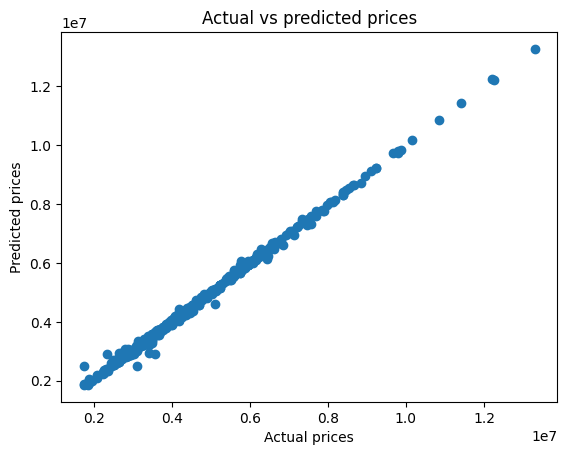

In [228]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs predicted prices")
plt.show()

#Prediction on test data

In [229]:
#Encoding the object type to the related datatype for test data 
lbl = preprocessing.LabelEncoder()
x_test['mainroad'] = lbl.fit_transform(x_test['mainroad'].astype(str))
x_test['guestroom'] = lbl.fit_transform(x_test['guestroom'].astype(str))
x_test['basement']=lbl.fit_transform(x_test['basement'].astype(str))
x_test['hotwaterheating']=lbl.fit_transform(x_test['hotwaterheating'].astype(str))
x_test['airconditioning']=lbl.fit_transform(x_test['airconditioning'].astype(str))
x_test['prefarea']=lbl.fit_transform(x_test['prefarea'].astype(str))
x_test['furnishingstatus']=lbl.fit_transform(x_test['furnishingstatus'].astype(str))
#Accuracy prediction for the test data which is more important than the training data
test_data_prediction=model.predict(x_test)

In [230]:
#R squared error
#Comparing the test data prediction with the original values
score_1=metrics.r2_score(y_test,test_data_prediction)
#Mean absolute error
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)
print("R squared error: ",score_1)#Should be near 0 to indicate good performance lesser the error more accurate the model
print("Mean absolute error: ",score_2)

R squared error:  0.4167369369211823
Mean absolute error:  994441.3830275229
